# (Core) Project 4 - Part 1


<b> INSTRUCTIONS
    
For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
You will then answer provided stakeholder questions and support your answers with visualizations.

<b> Supplemental Data: Holiday Data
    
- To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API.
- We have provided an extract of holidays, but you may wish to extract additional holiday information for dates not included in this file.
    - Share URL: https://docs.google.com/spreadsheets/d/1d8hoZzDAhbWx6EwNjrMTTOE5-23Pr1VxJeUxVj1JL9U/edit#gid=1027611797
    - Raw CSV URL (Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv
    
<b> Notes/Considerations:
- You may need to keep 2 forms of the data:
    - The original individual crime data with a datetime index. (Each row is 1 crime)
    - A resampled/converted crime counts version (Each row is 1 day)

<b> Task
    
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
  

1) Comparing Police Districts:
- Which district has the most crimes? Which has the least?

2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

3) Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
You can consider any crime that occurred between - 7 AM - 10 AM as AM rush hour
You can consider any crime that occurred between - 4 -7 PM as PM rush hour.
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?


4) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?


5) Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

# Data Dictionary

| Column Name | Decription |
|------------:|:-----------|
| ID | Unique identifier for the record. | 
| Date | Date when the incident occurred. this is 
|Primary Type| The primary description of the IUCR code.|
|Description| The secondary description of the IUCR code, a subcategory of the primary description.|
|Location Description|Description of the location where the incident occurred.|
|Arrest|Indicates whether an arrest was made.|
|Domestic|Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.|
|Beat| Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. |
|District| Indicates the police district where the incident occurred. |
|Ward|The ward (City Council district) where the incident occurred.|
|Latitude|The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.|
|Longitude|The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.|



In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from math import log10, floor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
# view all the csv data on the repository
glob.glob('Data/Chicago/Chicago-Crime_*.csv')

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [3]:
# read the csv's to df
all_dfs = []
for one_filename in glob.glob('Data/Chicago/Chicago-Crime_*.csv'):
    print(f'Data Loaded: {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

Data Loaded: Data/Chicago\Chicago-Crime_2001.csv
Data Loaded: Data/Chicago\Chicago-Crime_2002.csv
Data Loaded: Data/Chicago\Chicago-Crime_2003.csv
Data Loaded: Data/Chicago\Chicago-Crime_2004.csv
Data Loaded: Data/Chicago\Chicago-Crime_2005.csv
Data Loaded: Data/Chicago\Chicago-Crime_2006.csv
Data Loaded: Data/Chicago\Chicago-Crime_2007.csv
Data Loaded: Data/Chicago\Chicago-Crime_2008.csv
Data Loaded: Data/Chicago\Chicago-Crime_2009.csv
Data Loaded: Data/Chicago\Chicago-Crime_2010.csv
Data Loaded: Data/Chicago\Chicago-Crime_2011.csv
Data Loaded: Data/Chicago\Chicago-Crime_2012.csv
Data Loaded: Data/Chicago\Chicago-Crime_2013.csv
Data Loaded: Data/Chicago\Chicago-Crime_2014.csv
Data Loaded: Data/Chicago\Chicago-Crime_2015.csv
Data Loaded: Data/Chicago\Chicago-Crime_2016.csv
Data Loaded: Data/Chicago\Chicago-Crime_2017.csv
Data Loaded: Data/Chicago\Chicago-Crime_2018.csv
Data Loaded: Data/Chicago\Chicago-Crime_2019.csv
Data Loaded: Data/Chicago\Chicago-Crime_2020.csv
Data Loaded: Data/Ch

In [4]:
# concant all the dfs
df = pd.concat(all_dfs)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834343 entries, 0 to 122005
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 672.4+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
3,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...,...
122001,13122057,06/28/2023 12:47:00 AM,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644
122002,13122505,06/28/2023 12:50:00 PM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762
122003,13122064,06/28/2023 12:50:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846
122004,13122624,06/28/2023 12:50:00 PM,ROBBERY,AGGRAVATED,SIDEWALK,False,False,513,5.0,9.0,41.694309,-87.620794


# Data Cleaning
2 datas will be saved
1. Original individual crime
2. Resampled/converted crime count (Each row is 1 day)

In [5]:
df['Date'] =  pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p')
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834343 entries, 0 to 122005
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 672.4+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
351050,6568962,2008-10-21 02:00:00,CRIMINAL DAMAGE,TO PROPERTY,SMALL RETAIL STORE,False,False,1834,18.0,42.0,41.890080,-87.627224
239895,3420778,2004-07-08 20:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,422,4.0,7.0,41.751131,-87.557730
333851,1730916,2001-09-07 18:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2534,25.0,NaN,41.905141,-87.734641


In [6]:
data_types = df.dtypes
obj_data = data_types[(data_types == 'object')]

for column in obj_data.index:
  print(column)
  print(f'Unique Values: {df[column].unique()}\n')

Primary Type
Unique Values: ['OTHER OFFENSE' 'DECEPTIVE PRACTICE' 'SEX OFFENSE' 'THEFT' 'BATTERY'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL DAMAGE' 'CRIM SEXUAL ASSAULT'
 'MOTOR VEHICLE THEFT' 'OFFENSE INVOLVING CHILDREN' 'NARCOTICS' 'GAMBLING'
 'ASSAULT' 'WEAPONS VIOLATION' 'BURGLARY' 'LIQUOR LAW VIOLATION' 'ROBBERY'
 'CRIMINAL TRESPASS' 'INTERFERENCE WITH PUBLIC OFFICER' 'HOMICIDE'
 'KIDNAPPING' 'PROSTITUTION' 'STALKING' 'INTIMIDATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'RITUALISM' 'DOMESTIC VIOLENCE'
 'OBSCENITY' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']

Description
Unique Values: ['HARASSMENT BY TELEPHONE' 'FRAUD OR CONFIDENCE GAME'
 'CRIMINAL SEXUAL ABUSE' '$500 AND UNDER' 'AGGRAVATED: OTHER DANG WEAPON'
 'ARSON THREAT' 'TO PROPERTY' 'TO VEHICLE' 'PREDATORY' 'SIMPLE'
 'AUTOMOBILE' 'AGG SEX ASSLT OF CHILD FAM MBR' 'TELEPHONE THREAT'
 'POSS: CANNABIS 30GMS OR 

Unique Values: ['RESIDENCE' 'TAVERN/LIQUOR STORE' 'STREET' 'RESIDENCE PORCH/HALLWAY'
 'PARKING LOT/GARAGE(NON.RESID.)' 'BAR OR TAVERN'
 'GOVERNMENT BUILDING/PROPERTY' 'APARTMENT' 'CHA APARTMENT'
 'VEHICLE NON-COMMERCIAL' 'OTHER' 'CURRENCY EXCHANGE' 'RESTAURANT'
 'SIDEWALK' 'AIRPORT/AIRCRAFT' 'HOTEL/MOTEL' 'CHA PARKING LOT/GROUNDS'
 'SMALL RETAIL STORE' 'FACTORY/MANUFACTURING BUILDING' 'CTA PLATFORM'
 'HOSPITAL BUILDING/GROUNDS' 'DEPARTMENT STORE' 'ALLEY'
 'GROCERY FOOD STORE' 'BANK' 'RESIDENCE-GARAGE' 'CLEANING STORE'
 'OTHER COMMERCIAL TRANSPORTATION' 'PARK PROPERTY' 'WAREHOUSE' 'CTA TRAIN'
 'CAR WASH' 'SCHOOL, PUBLIC, GROUNDS' 'AUTO'
 'CHA HALLWAY/STAIRWELL/ELEVATOR' 'DRIVEWAY - RESIDENTIAL' 'DRUG STORE'
 'GAS STATION' 'BOWLING ALLEY' 'POLICE FACILITY/VEH PARKING LOT'
 'COMMERCIAL / BUSINESS OFFICE' 'NURSING HOME/RETIREMENT HOME' 'CTA BUS'
 'MOVIE HOUSE/THEATER' 'CONSTRUCTION SITE'
 'OTHER RAILROAD PROP / TRAIN DEPOT' 'MEDICAL/DENTAL OFFICE'
 'SCHOOL, PUBLIC, BUILDING' 'LAKEFRONT/WAT

In [7]:
df['Primary Type'] =  df['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',
                                                  'NON - CRIMINAL': 'NON-CRIMINAL',
                                                  'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
                                                  'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})
df['Primary Type'].value_counts()

THEFT                                1652945
BATTERY                              1431628
CRIMINAL DAMAGE                       892943
NARCOTICS                             748684
ASSAULT                               511701
OTHER OFFENSE                         486497
BURGLARY                              425772
MOTOR VEHICLE THEFT                   380917
DECEPTIVE PRACTICE                    348302
ROBBERY                               294085
CRIMINAL TRESPASS                     215155
WEAPONS VIOLATION                     108151
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56134
PUBLIC PEACE VIOLATION                 52505
CRIMINAL SEXUAL ASSAULT                34653
SEX OFFENSE                            30950
INTERFERENCE WITH PUBLIC OFFICER       18488
LIQUOR LAW VIOLATION                   14943
GAMBLING                               14620
ARSON                                  13363
HOMICIDE                               12692
KIDNAPPING

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10679
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 87853
Longitude                87853
dtype: int64

## Original Dataset

In [10]:
# set the datetime column as the index
crime_df = df.set_index('Date')
crime_df.info()
crime_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 13:00:00 to 2023-06-28 00:51:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 612.7+ MB


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1323184,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2001-01-01 01:00:00,1311735,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 00:47:00,13122057,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644
2023-06-28 12:50:00,13122505,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762
2023-06-28 00:50:00,13122064,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846


## Resampled Dataset

In [11]:
# set resampled df
resample_df = crime_df.copy()
resample_df['Total Crimes'] = 1
resample_df = resample_df.resample('D').sum(numeric_only = True)
resample_df.info()
resample_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8214 entries, 2001-01-01 to 2023-06-28
Freq: D
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8214 non-null   int64  
 1   Arrest        8214 non-null   int64  
 2   Domestic      8214 non-null   int64  
 3   Beat          8214 non-null   int64  
 4   District      8214 non-null   float64
 5   Ward          8214 non-null   float64
 6   Latitude      8214 non-null   float64
 7   Longitude     8214 non-null   float64
 8   Total Crimes  8214 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 641.7 KB


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Total Crimes
Date,,,,,,,,,
2001-01-01,4011740634,400,289,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,146,1404493,12797.0,147.0,47664.670569,-99856.853277,1143
2001-01-03,1542074517,343,162,1462886,13359.0,132.0,48045.805839,-100651.350927,1151
2001-01-04,1555657957,377,131,1397040,12994.0,0.0,48785.523718,-102222.916683,1166
2001-01-05,1701884634,415,159,1530155,14044.0,156.0,52769.463977,-110554.590960,1267
...,...,...,...,...,...,...,...,...,...
2023-06-24,9642396131,78,154,881988,8651.0,17094.0,30461.604116,-63821.066031,735
2023-06-25,10955199766,86,165,1008782,9893.0,21162.0,34570.960614,-72412.540390,840
2023-06-26,10142630966,93,106,901470,8835.0,18312.0,32304.769688,-67678.452805,775


# Questions to Answer
## 1) Comparing Police Districts:
### -Which district has the most crimes? Which has the least?

In [12]:
crime_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1323184,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2001-01-01 01:00:00,1311735,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534


In [13]:
crime_rate = (crime_df['District'].astype('Int64').value_counts(normalize = True)) * 100
crime_rate

8     6.717808
11    6.414641
6     5.848145
7     5.776524
25    5.687403
4     5.677102
3     5.071215
12    4.959948
9      4.88377
2     4.736546
19    4.493461
18    4.488406
5     4.429319
10     4.30876
15    4.281521
1     4.049656
14    3.867329
16    3.349235
22     3.27727
24    3.022965
17    2.886181
20    1.769617
31    0.003127
21    0.000051
Name: District, dtype: Float64

Text(0.5, 0, 'District')

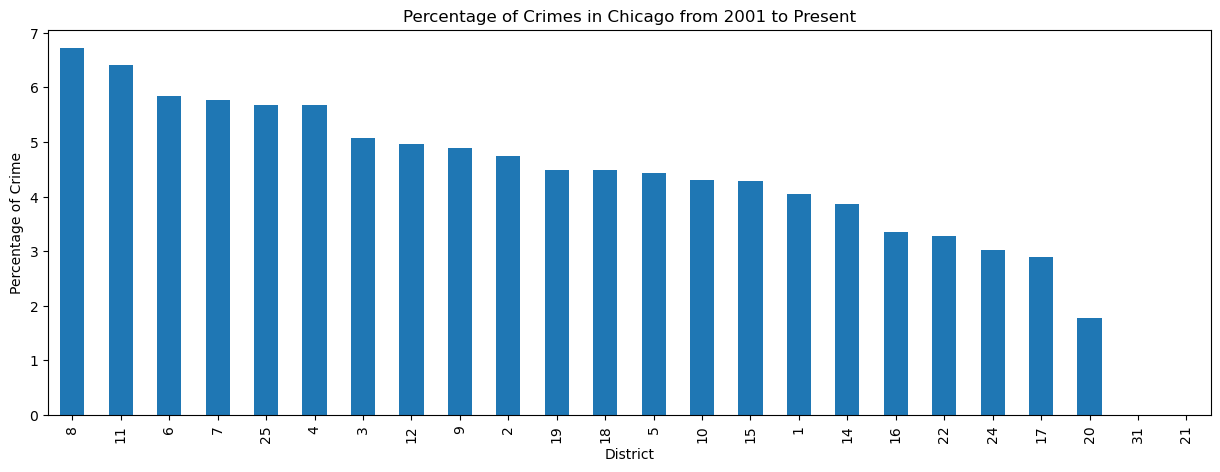

In [14]:
ax = crime_rate.plot.bar(figsize = (15, 5))
ax.set_title('Percentage of Crimes in Chicago from 2001 to Present')
ax.set_ylabel('Percentage of Crime')
ax.set_xlabel('District')

According to the Data:
1. District 8 has the most crime at 6.72%.
2. District 31 and 21 almost have no crimes at all.

## 2) Crimes Across the Years:
### - Is the total number of crimes increasing or decreasing across the years?


In [15]:
crime_yr = crime_df.resample('Y').size()
crime_yr

Date
2001-12-31    485885
2002-12-31    486804
2003-12-31    475983
2004-12-31    469421
2005-12-31    453772
2006-12-31    448177
2007-12-31    437087
2008-12-31    427169
2009-12-31    392824
2010-12-31    370501
2011-12-31    351971
2012-12-31    336273
2013-12-31    307474
2014-12-31    275740
2015-12-31    264773
2016-12-31    269805
2017-12-31    269091
2018-12-31    268802
2019-12-31    261284
2020-12-31    212160
2021-12-31    208689
2022-12-31    238652
2023-12-31    122006
Freq: A-DEC, dtype: int64

In [16]:
def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000 ** num_thousands, 2)
    return f'{value : g}'+' KMGTPEZY'[num_thousands]

Text(0.5, 0, 'Year')

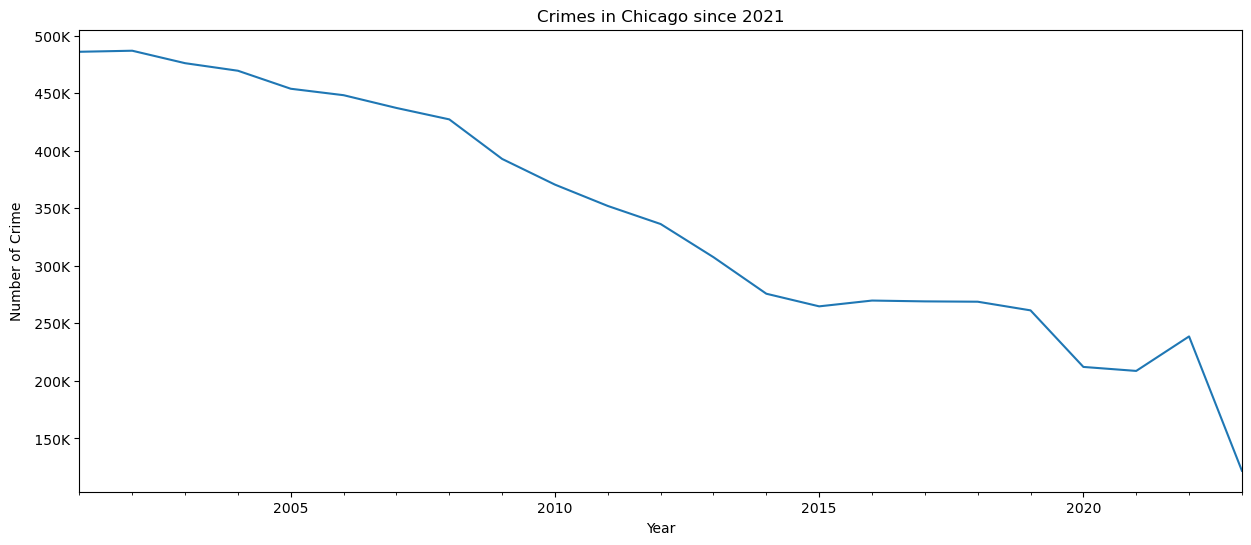

In [17]:
ax = crime_yr.plot(figsize = (15, 6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_title('Crimes in Chicago since 2021')
ax.set_ylabel('Number of Crime')
ax.set_xlabel('Year')

- According to the graph the crime rate in Chicago has been decreasing across the year.


### - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [18]:
cols_to_drop = ['ID', 'Arrest', 'Domestic', 'Beat', 
                'District', 'Ward', 'Latitude', 'Longitude']
# resample
melted_df = crime_df.copy()
melted_df['Count'] = 1
melted_df = melted_df.groupby('Primary Type').resample('Y').sum()
melted_df = melted_df.drop(columns = cols_to_drop)
melted_df

Count
Primary Type      Date             
ARSON             2001-12-31   1011
                  2002-12-31   1032
                  2003-12-31    955
                  2004-12-31    778
                  2005-12-31    691
...                             ...
WEAPONS VIOLATION 2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8766
                  2023-12-31   4246

[700 rows x 1 columns]

In [19]:
unstacked_df = melted_df.unstack(level = 0)
unstacked_df

Count                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Date                                              
2001-12-31    1011.0  31384.0  93460.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88380.0  25157.0   
2004-12-31     778.0  28850.0  87136.0  24564.0   
2005-12-31     691.0  27067.0  83964.0  25503.0   
2006-12-31     726.0  25945.0  80666.0  24324.0   
2007-12-31     712.0  26313.0  79593.0  24858.0   
2008-12-31     644.0  25449.0  75926.0  26218.0   
2009-12-31     616.0  22861.0  68460.0  26767.0   
2010-12-31     522.0  21537.0  65402.0  26422.0   
2011-12-31     504.0  20411.0  60459.0  26620.0   
2012-12-31     469.0  19900.0  59134.0  22845.0   
2013-12-31     364.0  17972.0  54006.0  17895.0   
2014-12-31     397.0  16903.0  49452.0  14569.0   
2015-12-31     453.0  17048.0  48923.0  13184.0   
2016-12-31     516.0  18742.0  50299.0  14289.0   
2017-12-31     444.0  19306.0  49239.0  13001.0   
2018-12-31     373.0  20406.0  49828.0  11746.0   
2019-12-31     376.0  20620.0  49518.0   9638.0   
2020-12-31     588.0  18254.0  41512.0   8757.0   
2021-12-31     529.0  20342.0  40459.0   6659.0   
2022-12-31     422.0  20788.0  40896.0   7592.0   
2023-12-31     241.0  10603.0  20763.0   3527.0   

                                                                \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
Date                                                             
2001-12-31                                 1.0         55858.0   
2002-12-31                                 0.0         55941.0   
2003-12-31                                 0.0         55011.0   
2004-12-31                                 0.0         53164.0   
2005-12-31                                 0.0         54548.0   
2006-12-31                                 0.0         57124.0   
2007-12-31                                 0.0         53749.0   
2008-12-31                                 0.0         52842.0   
2009-12-31                                 0.0         47725.0   
2010-12-31                                 0.0         40653.0   
2011-12-31                                 0.0         37332.0   
2012-12-31                                 0.0         35855.0   
2013-12-31                                 0.0         30855.0   
2014-12-31                                15.0         27798.0   
2015-12-31                                34.0         28676.0   
2016-12-31                                36.0         31018.0   
2017-12-31                                69.0         29045.0   
2018-12-31                               149.0         27824.0   
2019-12-31                               217.0         26681.0   
2020-12-31                               148.0         24878.0   
2021-12-31                               173.0         25094.0   
2022-12-31                               177.0         27238.0   
2023-12-31                                91.0         14034.0   

                                                                           \
Primary Type CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS DECEPTIVE PRACTICE   
Date                                                                        
2001-12-31                    1808.0           13241.0            14948.0   
2002-12-31                    1834.0           13880.0            13731.0   
2003-12-31                    1612.0           14807.0            13459.0   
2004-12-31                    1579.0           15913.0            13255.0   
2005-12-31                    1558.0           16655.0            13590.0   
2006-12-31                    1486.0           14505.0            13606.0   
2007-12-31                    1560.0           13699.0            14170.0   
2008-12-31                    1558.0           12310.0            14931.0   
2009-12-31                    1443.0           10851.0            13876.0   
2010-12-31                    1390.0           

Text(0.5, 0, 'Year')

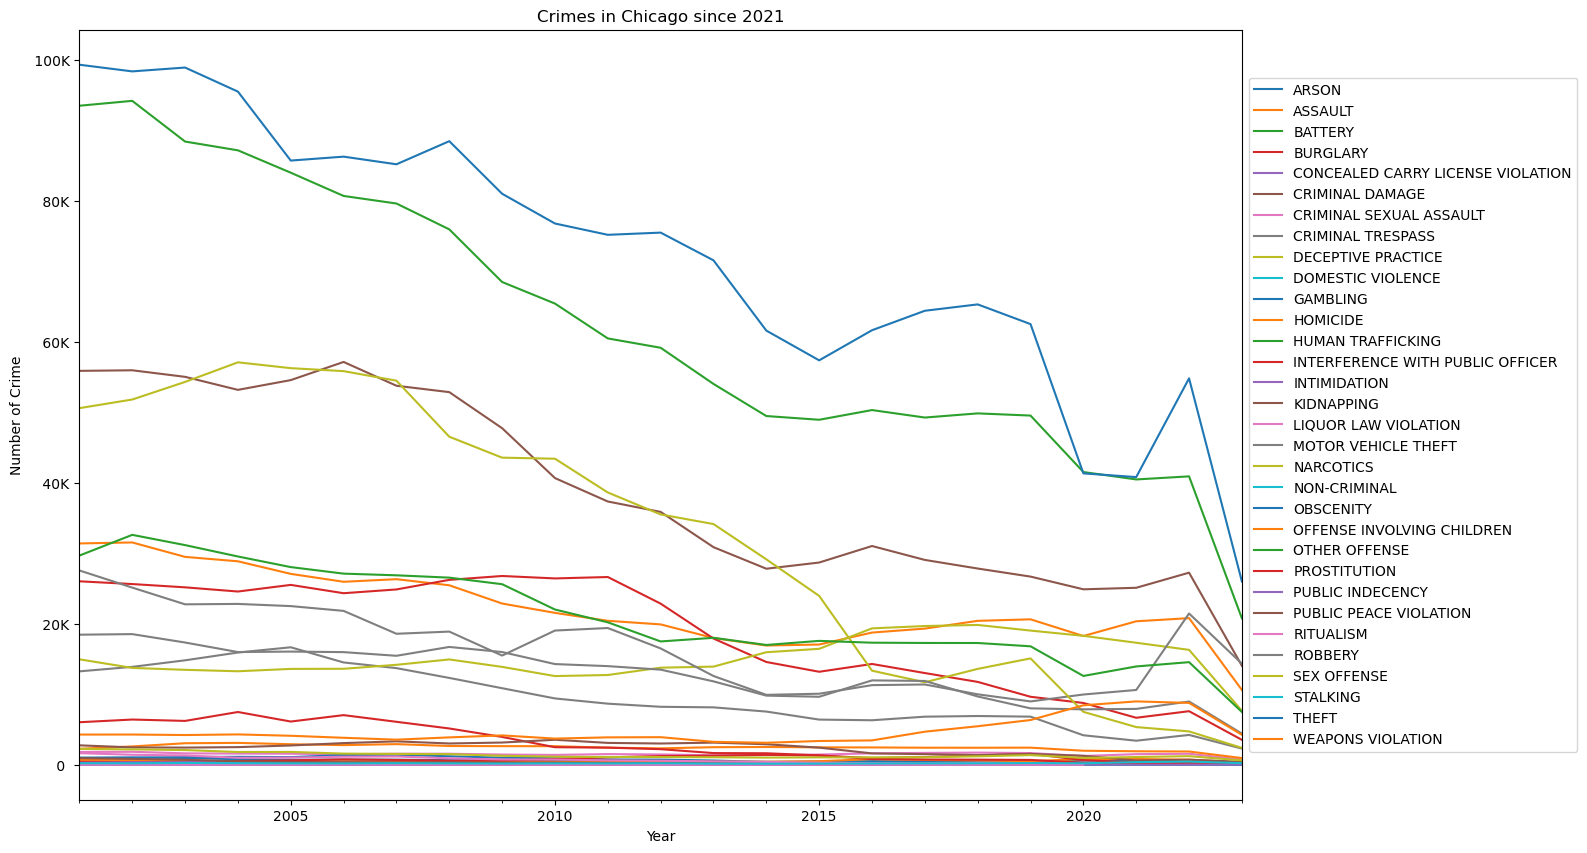

In [20]:
ax = unstacked_df['Count'].plot(figsize = (15, 10))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.legend(loc = 'center left', bbox_to_anchor =(1, 0.5))

ax.set_title('Crimes in Chicago since 2021')
ax.set_ylabel('Number of Crime')
ax.set_xlabel('Year')

- The graph shows that most rate of the crime seems to have decreased throughout the year.

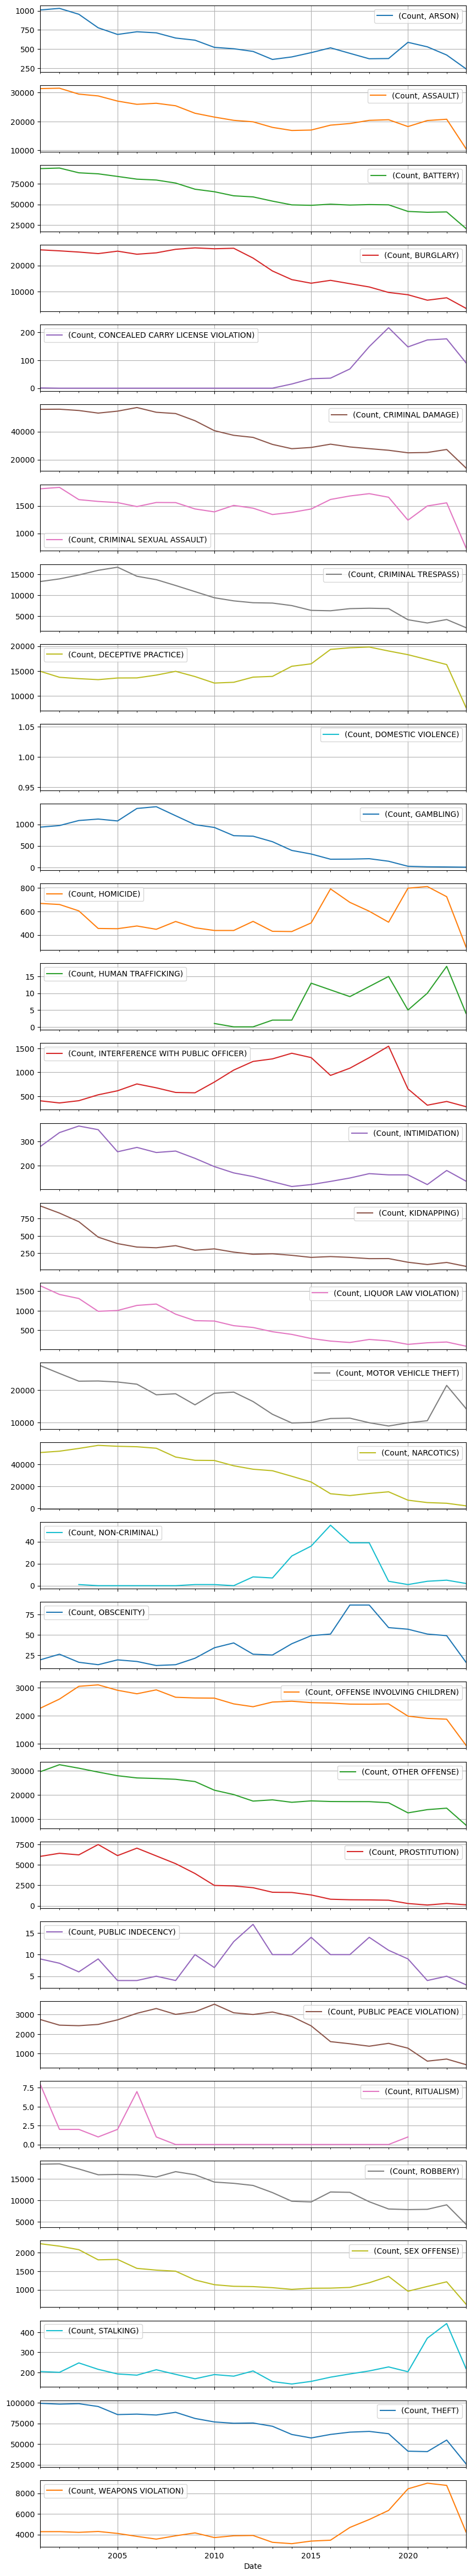

In [21]:
unstacked_df.plot(subplots = True,
                  figsize = (10, 60),
                  grid = True);

1. Decreasing throughout the years are seen on the following:
    1. Battery
    3. Criminal Damage
    5. OTher Offense
    5. Prostitution
    6. Robbery
    7. Theft
    8. Kidnapping
    9. Liquor Law Violation
2. The list below are the crime that has seen with an increase in rate followed by a decrease over time.
    1. Arson 
    2. Assault
    3. Burglary
    4. Concealed License Violation
    5. Criminal Sexual Assault
    6. Criminal Trespass
    7. Deceptive Practice
    8. Obscenity
    9. Offensive involving Children
    10. Public Indecency
    11. Stalking
    12. Gambling
    13. Homicide
    14. Human Trafficking
    15. Intimidation
    16. Interference with public Officer
    17. Motor Vehicle Theft
    18. Sex Offense 
    
- The crime rate in Chicago has dropped since 2021.